In [2]:
import numpy as np
import pandas as pd
import json
import math
import matplotlib
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import seaborn as sns


## Visualize dataset

In [3]:
from utilities import *

with open('./archive/toyota.csv') as file:  # The name of the file is focus.csv, which has been uploaded into exercise folder.
    df = pd.read_csv(file)
    df_2=df
    
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [7]:
#deal with fueltype,model.transmission
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [8]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [9]:
m = df['model'].unique()
print(m)
for i in range (len(m)):
    df['model'].replace(m[i],i,inplace=True)

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


In [10]:
#is this okay? do i need to do the same thing to the model
df['fuelType'].replace('Petrol',0,inplace=True)
df['fuelType'].replace('Hybrid',1,inplace=True)
df['fuelType'].replace('Diesel',2,inplace=True)
df['fuelType'].replace('Other',3,inplace=True)
df['fuelType']=df['fuelType'].astype(int)

df['transmission'].replace('Manual',0,inplace=True)
df['transmission'].replace('Automatic',1,inplace=True)
df['transmission'].replace('Semi-Auto',2,inplace=True)
df['transmission'].replace('Other',3,inplace=True)
df['transmission']=df['transmission'].astype(int)

In [11]:
df.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,-0.034195,0.136978,0.086329,0.055640,0.154079,0.104013,0.012653,0.028740
year,-0.034195,1.000000,0.420959,0.002347,-0.727749,-0.097247,0.283455,-0.020607,-0.045567
price,0.136978,0.420959,1.000000,0.489834,-0.297936,0.440677,0.214498,-0.039910,0.727592
transmission,0.086329,0.002347,0.489834,1.000000,-0.000475,0.394840,-0.102734,0.245259,0.445229
mileage,0.055640,-0.727749,-0.297936,-0.000475,1.000000,0.226202,-0.205285,0.044889,0.182615
fuelType,0.154079,-0.097247,0.440677,0.394840,0.226202,1.000000,-0.040026,0.220683,0.609459
tax,0.104013,0.283455,0.214498,-0.102734,-0.205285,-0.040026,1.000000,-0.430292,0.155727
mpg,0.012653,-0.020607,-0.039910,0.245259,0.044889,0.220683,-0.430292,1.000000,-0.106868
engineSize,0.028740,-0.045567,0.727592,0.445229,0.182615,0.609459,0.155727,-0.106868,1.000000


In [12]:
df[df.columns].corr()['price']

model           0.136978
year            0.420959
price           1.000000
transmission    0.489834
mileage        -0.297936
fuelType        0.440677
tax             0.214498
mpg            -0.039910
engineSize      0.727592
Name: price, dtype: float64

In [13]:
X = df.drop(columns="price")
y = df["price"]
print(X.shape)
print(y.shape)
print(X["model"].shape)

(6738, 8)
(6738,)
(6738,)


In [14]:
col = X.columns
print(col)

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')


<AxesSubplot: xlabel='count', ylabel='model'>

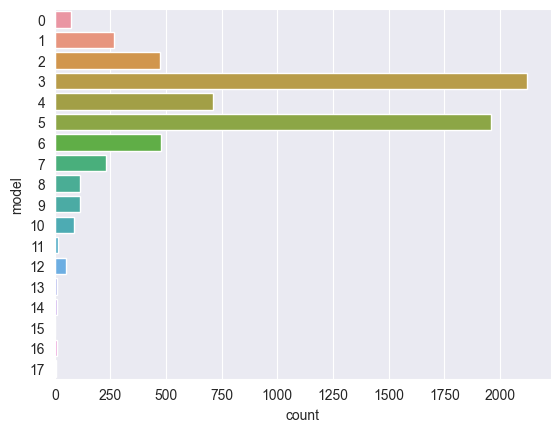

In [15]:
sns.countplot(y = X["model"])

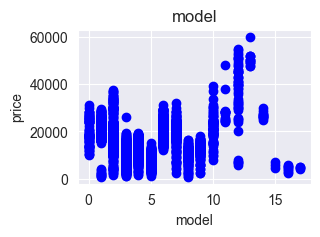

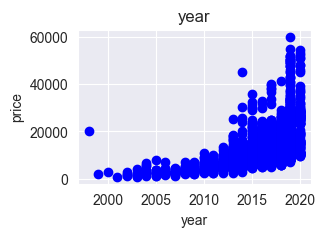

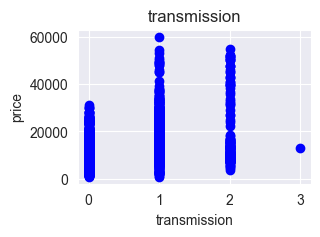

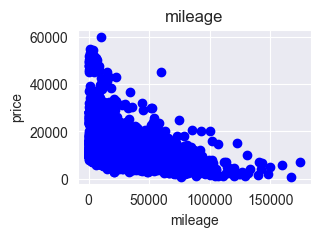

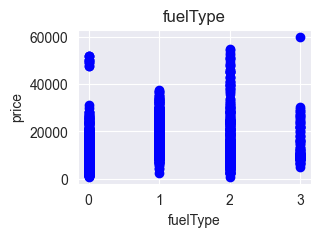

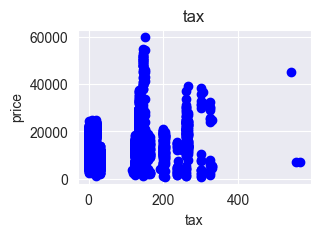

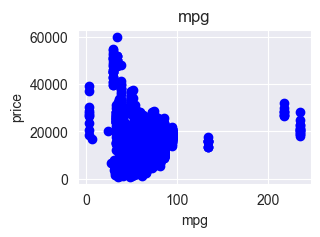

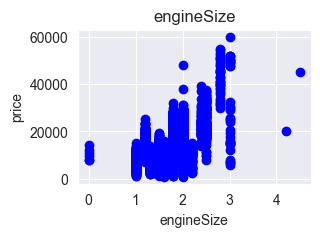

In [16]:
i=0
for c in col :
    fig, ax1 = plt.subplots(figsize=(3,2))
    plt.scatter(X[c],y,color='blue')
    i+=1
    plt.title(c)
    plt.ylabel('price')
    plt.xlabel(c)
    plt.show()

## Linear regression

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict

In [19]:
X = df.drop(columns="price")
y = df["price"]

In [20]:
model = LinearRegression()

kfold = KFold(n_splits=5, random_state=1234, shuffle = True)
results_reg = cross_validate(estimator=model,X=X,
                                          y=y,
                                          cv=kfold)
results_reg

{'fit_time': array([0.02758813, 0.00756001, 0.00763106, 0.01862717, 0.00759602]),
 'score_time': array([0.00408196, 0.00349712, 0.00344682, 0.00342178, 0.00368595]),
 'test_score': array([0.7916564 , 0.80829675, 0.7973424 , 0.79214083, 0.80733108])}

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [22]:
model = model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [23]:
print('Accuracy on Testing set: %.1f ' %(model.score(X_test,y_test)*100))

Accuracy on Testing set: 78.6 


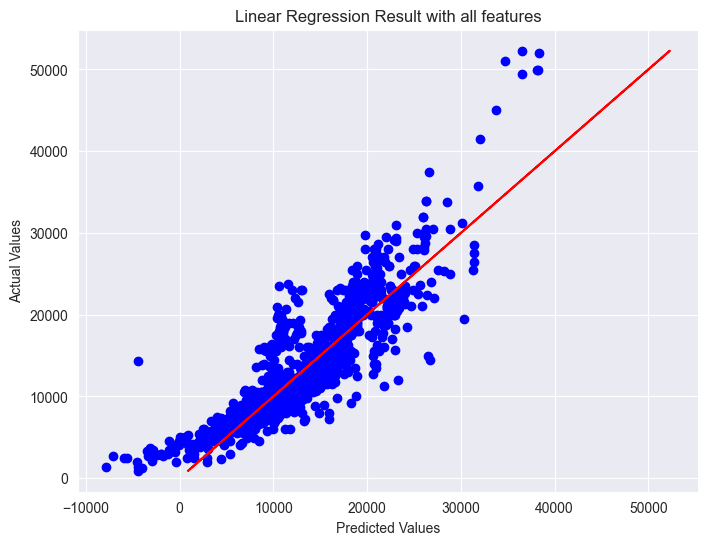

In [24]:
fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(y_predict,y_test,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('Linear Regression Result with all features')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


## Find the best fit features

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price']), df[['price']],test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4716, 8)
(2022, 8)
(4716, 1)
(2022, 1)


In [26]:
def select (features,rtrain,rtest):
    y_train_copy = y_train.values.ravel()
    selector = SelectKBest(f_regression, k = k)
    X_train_trans = selector.fit_transform(X_train, y_train_copy)
    X_test_trans = selector.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_trans, y_train_copy)
    features.append(k)
    rtrain.append(lr.score(X_train_trans, y_train_copy))
    rtest.append(lr.score(X_test_trans, y_test))

<AxesSubplot: >

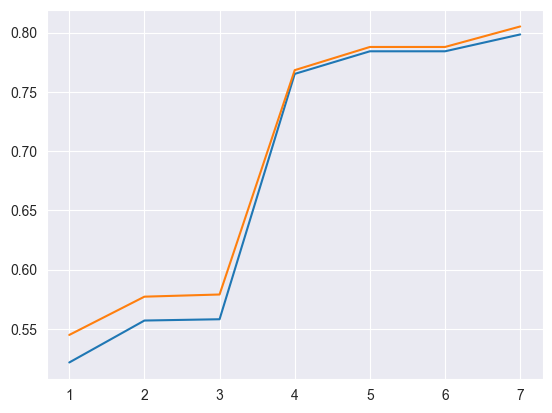

In [27]:
features = []
rmsetrain = []
rmsetest = []
for k in range(1,len(col)):
    select (features,rmsetrain,rmsetest)
    
    
sns.lineplot(x = features, y = rmsetrain)
sns.lineplot(x = features, y = rmsetest)

In [28]:
y_train_copy = y_train.values.ravel()
selector = SelectKBest(f_regression, k=4)
X_train_trans = selector.fit_transform(X_train,y_train_copy)
X_test_trans = selector.transform(X_test)
print(X_test_trans)
print(X_train_trans)
col_res = col[selector.get_support()]
print(col_res)

[[2.019e+03 1.000e+00 1.000e+00 1.500e+00]
 [2.019e+03 0.000e+00 0.000e+00 1.000e+00]
 [2.019e+03 1.000e+00 1.000e+00 1.800e+00]
 ...
 [2.017e+03 1.000e+00 1.000e+00 1.800e+00]
 [2.015e+03 0.000e+00 0.000e+00 1.000e+00]
 [2.017e+03 2.000e+00 0.000e+00 1.800e+00]]
[[2.015e+03 1.000e+00 1.000e+00 1.500e+00]
 [2.019e+03 1.000e+00 1.000e+00 1.800e+00]
 [2.016e+03 1.000e+00 1.000e+00 1.800e+00]
 ...
 [2.017e+03 1.000e+00 1.000e+00 1.800e+00]
 [2.017e+03 0.000e+00 2.000e+00 2.400e+00]
 [2.014e+03 0.000e+00 0.000e+00 1.000e+00]]
Index(['year', 'transmission', 'fuelType', 'engineSize'], dtype='object')


## linear regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[col_res],df[['price']],test_size=0.3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
print('Train R-Squared: {}'.format(regr.score(X_train, y_train)))
print('Test R-Squared: {}'.format(regr.score(X_test, y_test)))

Train R-Squared: 0.7649282317993424
Test R-Squared: 0.7693122742904253


In [31]:
print('Accuracy on Testing set: %.1f ' %(regr.score(X_test,y_test)*100))

Accuracy on Testing set: 76.9 


In [32]:
y_predict = regr.predict(X_test)

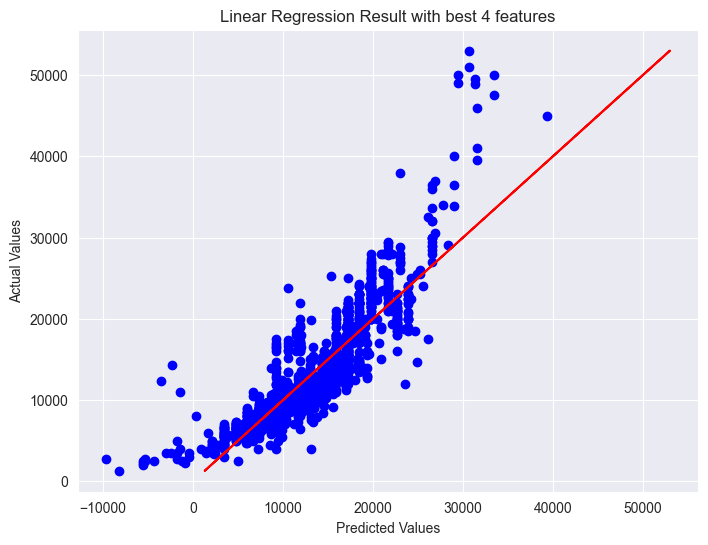

In [33]:
fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(y_predict,y_test,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('Linear Regression Result with best 4 features')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [34]:
col_2 = ['year', 'transmission', 'mileage', 'fuelType', 'engineSize']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(df[col_res],df[['price']],test_size=0.3)


In [35]:
new_regr = linear_model.LinearRegression()
new_regr.fit(new_X_train, new_y_train)
print('New_Train R-Squared: {}'.format(new_regr.score(new_X_train, new_y_train)))
print('New_Test R-Squared: {}'.format(new_regr.score(new_X_test, new_y_test)))

New_Train R-Squared: 0.7677503815446348
New_Test R-Squared: 0.7620798958374067


## method2: find the best fit features

In [36]:
df2 = df[['year', 'mileage', 'price']]
df2

,year,mileage,price
0,2016,24089,16000
1,2017,18615,15995
2,2015,27469,13998
3,2017,14736,18998
4,2017,36284,17498
...,...,...,...
6733,2011,30000,5500
6734,2011,36154,4985
6735,2012,46000,4995
6736,2011,60700,3995


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns = ['price']), df2[['price']],test_size=0.3)
print(X_train.shape)
print(y_train.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

(4716, 2)
(4716, 1)
0.17801469612325882
0.17523977613952202


In [38]:
#expand
#polynomial features 
#en expand

#cross validation
#Lasso

## Linear Regression with All Features

In [39]:
##
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
lm = LinearRegression()
lm.fit(Xtrain, ytrain)
y_p = lm.predict(Xtest)
print('Accuracy on Testing set: %.1f ' %(lm.score(Xtest,ytest)*100))

Accuracy on Testing set: 80.8 


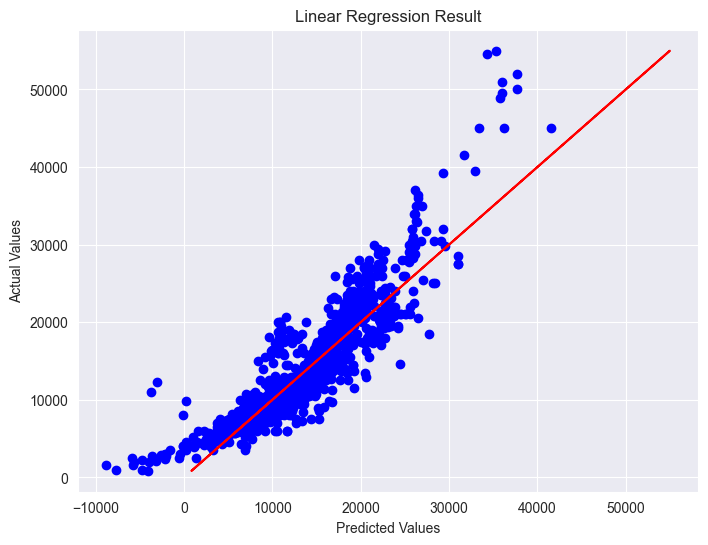

In [40]:
##
fig, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(y_p, ytest, color='blue')
plt.plot(ytest, ytest, color='red')
plt.title('Linear Regression Result')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Decision Tree Regression

<AxesSubplot: >

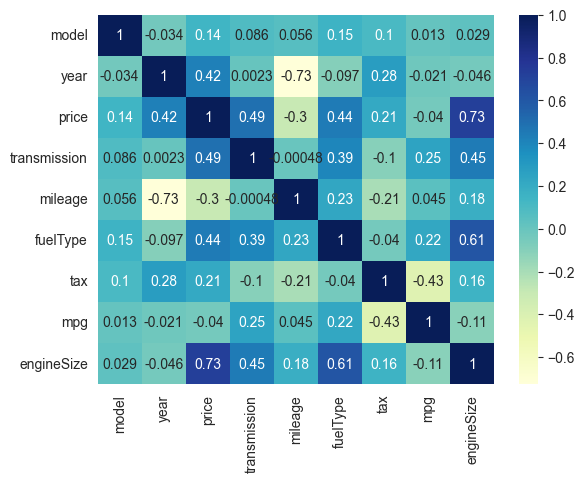

In [41]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(Xtrain,ytrain)
prediction = tree.predict(Xtest)

In [43]:
tree.score(Xtest,prediction)

1.0

In [44]:
from sklearn.metrics import mean_absolute_error
errors = (mean_absolute_error(ytest,prediction))

print(errors)

974.4626607319485


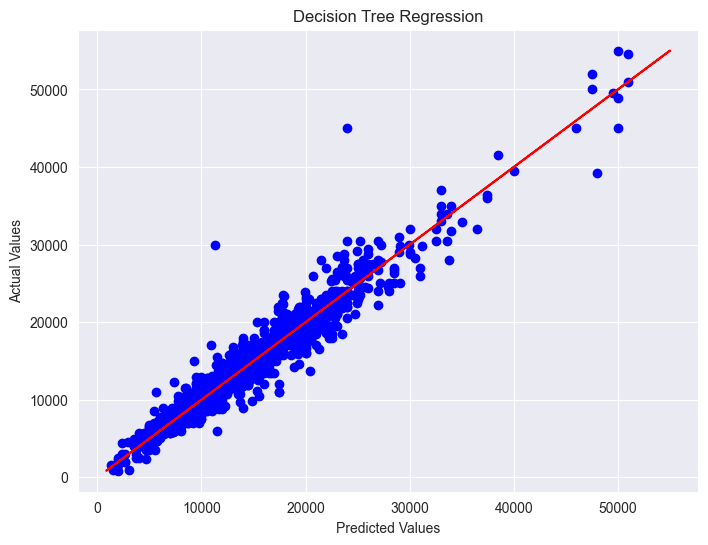

In [45]:
fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(prediction,ytest,color='blue')
plt.plot(ytest,ytest,color='red')
plt.title('Decision Tree Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [46]:
print('Accuracy on Testing set: %.1f ' %(tree.score(Xtest,ytest)*100))

Accuracy on Testing set: 94.3 


In [47]:
r2_score(prediction, ytest)

0.9415320432752415